<a href="https://colab.research.google.com/github/ChecinskiBartlomiej/UM/blob/main/UM_hw_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




We will use the Breast Cancer Wisconsin dataset. It contains 569 examples, each with 30 numerical features. These features represent various characteristics of cell nuclei obtained from digitized images of a fine needle aspirate (FNA) of a breast mass. Examples of features include radius, texture, perimeter, area, smoothness, compactness, concavity, and symmetry. Based on these features, using Logistic Regression, we will try to predict the target variable, which is binary with two classes representing malignant (1) and benign (0) tumors.

In [14]:
# Read data.
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, y.shape)

# Split data.
from sklearn.model_selection import train_test_split

# First, split off the test set (20% of the total data)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then, split the remaining data into training (60% total) and validation (20% total).
# Since X_train_val is 80% of the data, splitting 75% for training gives 0.75 * 80% = 60% overall.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

# Fit Logistic Regression.
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train);

(569, 30) (569,)
357
Train set size: 341
Validation set size: 114
Test set size: 114


In order to examine the performance of our model, we will use the validation set and plot the ROC curve. The ROC (Receiver Operating Characteristic) curve illustrates the performance of classifier model as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

The Area Under the Curve (AUC) is a single scalar value that summarizes the overall performance of the classifier. An AUC value close to 1.0 indicates excellent discriminative ability between the classes, while an AUC of 0.5 suggests that the classifier performs no better than random guessing.

We also want to pick a threshold which is optimal in some sense. Later we will classify an example as 1 if output of our model is bigger or equal to this optimal threshold.

AUC: 0.9872256796593515
Optimal threshold: 0.8349590450064442


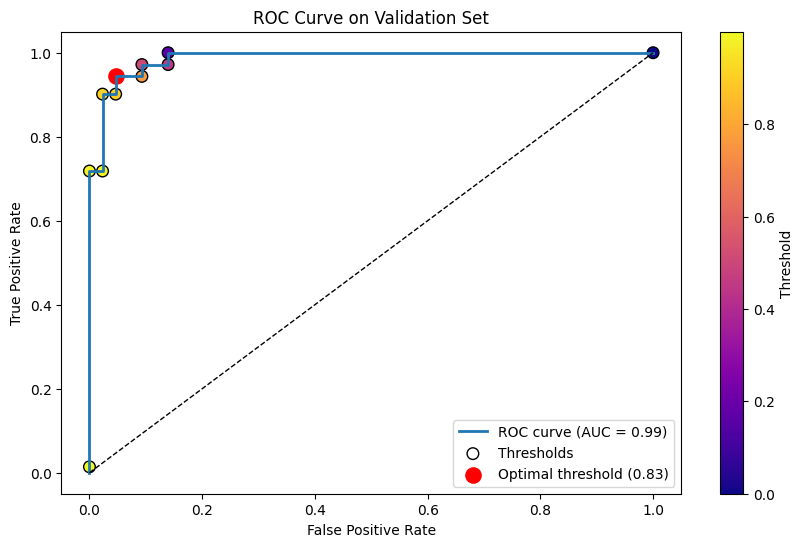

In [8]:
# Compute predicted probabilities on validation set.
y_val_prob = logistic_model.predict_proba(X_val)[:, 1]

# Compute false positive rates, true positive rates, thresholds and plot ROC curve.
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
auc_score = roc_auc_score(y_val, y_val_prob)
print("AUC:", auc_score)

# Determine the optimal threshhold by maximizing Youden's J statistics.
import numpy as np

J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

# Plot ROC curve.
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})", lw=2)
sc = plt.scatter(fpr, tpr, c=thresholds, cmap='plasma', edgecolors='black', s=70, label='Thresholds')
cbar = plt.colorbar(sc)
cbar.set_label("Threshold")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], s=120, color='red', marker='o',
            label=f'Optimal threshold ({optimal_threshold:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend(loc="lower right")
plt.show()

It is time to make predictions on unseen data and evaluate our model using metrics such as accuracy, precision, recall, F1-score and specificity.


In [9]:
# Make predictions on test set.
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

# Calculate metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Generate confusion matrix to calculate specificity.
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy: 0.94
Precision: 0.99
Recall: 0.92
F1-Score: 0.95
Specificity: 0.98


Sensitivity measures the proportion of actual positive cases that are correctly identified by the classifier. In other words, it tells us how good the test is at detecting the positive cases, $\text{sensitivity} = \frac{TP}{TP + FN}$.

Specificity measures the proportion of actual negative cases that are correctly identified by the classifier. It indicates how effective the test is at correctly rejecting negative cases, $\text{specificity} = \frac{TN}{TN + FP}$.

Increasing the threshold yields fewer accepted cases. Since we are more restrictive, we obtain fewer false positives, which results in higher specificity. On the other hand, decreasing the threshold yields more accepted cases. Since we are less restrictive, we obtain fewer false negatives, which results in higher sensitivity.

Results are different, but you can not generally say that it is better to have a higher sensitivity than higher specificity or vice versa. Best threshhold depends on the task.

Consider spam filtering. The cost of incorrectly classifying a legitimate email as spam (false positive) is higher than letting a spam message slip through (false negative), so higher specificity is prioritized. On the other hand, in disease detection, the cost of incorrectly classifying someone as healthy when they actually have a disease (false negative) is greater than the cost of mistakenly classifying someone as diseased (false positive), because the latter error can often be corrected with further testing and treatment adjustments.

The ROC curve provides a clear visualization of the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity), with TPR plotted on the y-axis and FPR on the x-axis. This visualization aids in selecting an optimal threshold for classification.

While the task's specific requirements should always guide the choice of threshold, several objective criteria can also be used. For instance, in our example we employed Youden's J statistic, which seeks to maximize TPR - FPR. Alternatively, one may select the threshold corresponding to the point on the ROC curve that is closest to the ideal point (0,1).

